# Predict App Popularity

Objective: 
- 1. Explore the training data
- 2. Explore the testing data


Files:
- train.csv- data used for training along with target variable
- test.csv- data on which predictions are to be made

In [1]:
## import needed libraries/packages
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from IPython.display import display

In [2]:
## %load My_Functions.py
from My_Functions import num_descriptive, cate_frequency
from My_Functions import num_dist, num_boxplot, num_hist
from My_Functions import transform_kmb, transform_install, transform_p, transform_bp, transform_bc, transform_y, transform_ly 

In [3]:
import sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [5]:
## display sklearn version
print(sklearn.__version__)

0.24.2





## Data Wrangling & Visualization (Training Set)

In [6]:
## load training data
train = pd.read_csv("I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/train.csv")

In [7]:
## view data
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High


In [8]:
## check the size of the dataset
print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of rows: 1975
Number of columns: 10


In [9]:
## explore columns
train.columns

Index(['app_id', 'category', 'reviews', 'size', 'installs', 'price',
       'suitable_for', 'last_update', 'latest_ver', 'popularity'],
      dtype='object')

In [10]:
## check data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   app_id        1975 non-null   int64 
 1   category      1975 non-null   object
 2   reviews       1975 non-null   int64 
 3   size          1975 non-null   object
 4   installs      1975 non-null   object
 5   price         1975 non-null   object
 6   suitable_for  1975 non-null   object
 7   last_update   1975 non-null   object
 8   latest_ver    1971 non-null   object
 9   popularity    1975 non-null   object
dtypes: int64(2), object(8)
memory usage: 154.4+ KB


In [11]:
## Check missing values:
## do not remove NAs here 
## there are 4 rows with NAs in total 
## the number is relatively small
## there may be NA in the test set as well

train.isna().sum()

app_id          0
category        0
reviews         0
size            0
installs        0
price           0
suitable_for    0
last_update     0
latest_ver      4
popularity      0
dtype: int64

In [12]:
## create the list of numerical and categorical variables
var_list_n = list(train.select_dtypes(include = ["int64", "float64"]).columns)
var_list_c = list(train.select_dtypes(include = ["object", "category"]).columns)

### Explore Numerical Variables

###### - Function 1: Descriptive Statistics (in My_Functions.py)

In [13]:
## descriptive information (numerical)
display(pd.DataFrame(num_descriptive(train, var_list_n)))

## descriptive information (numerical)
# train.describe()
# train[['app_id', 'reviews']].describe()
# train[var_list_n].describe()

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,481867.0,490685.787342,2.880260e+05,1160,999218,998058,-1.190782,0.034026
1,reviews,516.0,198816.162532,1.493712e+06,1,44891723,44891722,476.676102,18.911591


#### Plots

###### - Function 2: Distribution Plot Loop over a list of Variables (in My_Functions.py)

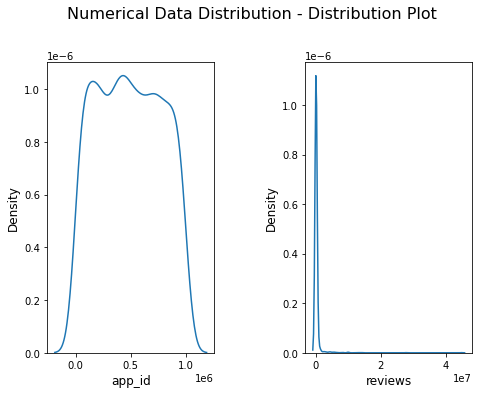

In [14]:
num_dist(train, var_list_n)

###### - Function 3: Boxplot Loop over a list of Variables (in My_Functions.py)

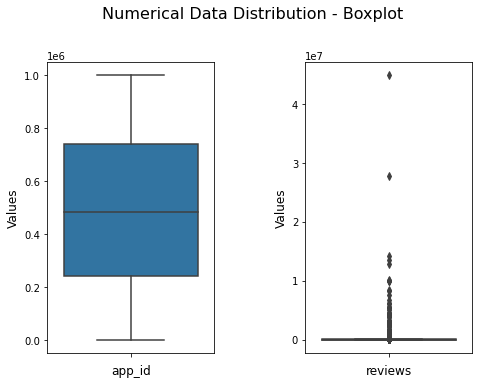

In [15]:
num_boxplot(train, var_list_n)

###### - Function 4: Histogram Loop over a list of Variables (in My_Functions.py)

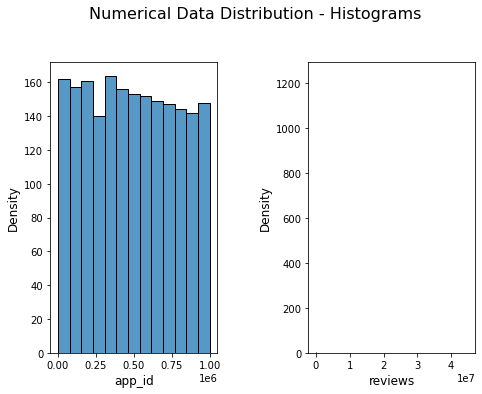

In [16]:
num_hist(train, var_list_n)

#### Generate New Features based on Numerical Variables

In [17]:
## new feature 1: review_c

## new categorical variable based on 'reviews'

# train['review_c'] = pd.cut(train.reviews, bins = [0,100,10000,100000,1000000,50000000],
#                            labels = ['0.1k','10k','100k','1m','50m'])

train['review_c'] = pd.cut(train.reviews, bins = [0,100,10000,100000,1000000,50000000],
                           labels = [0.1, 10, 100, 1000, 50000])
train['review_c'] = train['review_c'].astype(int)

###### - Function 5: Frequency Statistics (in My_Functions.py)

In [18]:
## frequency: review_c
cate_frequency(train, 'review_c')

,Category,Count,Percentage
0,0,710,35.949367
1,10,696,35.240506
2,100,318,16.101266
3,1000,189,9.569620
4,50000,62,3.139241


In [19]:
## new feature 2: review_log

## 'reviews' -->  log transformation
train['review_log'] = np.log2(train['reviews'])

### Explore Categorical Variables

In [20]:
## descriptive information (categorical)
# train[['category', 'size', 'installs', 'price', 'suitable_for', 'last_update', 'latest_ver', 'popularity']].describe()
train[var_list_c].describe()

,category,size,installs,price,suitable_for,last_update,latest_ver,popularity
count,1975,1975,1975,1975,1975,1975,1971,1975
unique,33,229,18,41,5,669,922,2
top,FAMILY,12M,"10,000+",0,Everyone,"August 3, 2018",1.0,High
freq,409,53,275,1780,1641,56,157,1450


#### popularity

In [21]:
## frequency: popularity
cate_frequency(train, 'popularity')

,Category,Count,Percentage
0,High,1450,73.417722
1,Low,525,26.582278


In [22]:
## new feature 3: popularity_b

## recode popularity
train["popularity_b"] = train["popularity"]
train["popularity_b"].replace(['Low','High'], ['0', '1'], inplace=True)

In [23]:
## frequency: popularity_b
cate_frequency(train, 'popularity_b')

,Category,Count,Percentage
1,1,1450,73.417722
0,0,525,26.582278


#### suitable_for

In [24]:
## frequency: suitable_for
cate_frequency(train, 'suitable_for')

,Category,Count,Percentage
1,Everyone,1641,83.088608
4,Teen,188,9.518987
3,Mature 17+,79,4.000000
2,Everyone 10+,66,3.341772
0,Adults only 18+,1,0.050633


In [25]:
## new feature 4: suitable_for

## there is only one app in the category "Adults only 18+"
## Not representative
## replace it with "Mature 17+"
train = train.replace({'suitable_for' : { 'Adults only 18+' : 'Mature 17+'}})

In [26]:
## frequency: modified suitable_for
cate_frequency(train, 'suitable_for')

,Category,Count,Percentage
0,Everyone,1641,83.088608
3,Teen,188,9.518987
2,Mature 17+,80,4.050633
1,Everyone 10+,66,3.341772


#### category

In [27]:
## frequency: category
cate_frequency(train, 'category')

,Category,Count,Percentage
11,FAMILY,409,20.708861
14,GAME,191,9.670886
29,TOOLS,171,8.658228
20,MEDICAL,106,5.367089
18,LIFESTYLE,91,4.607595
15,HEALTH_AND_FITNESS,84,4.253165
12,FINANCE,82,4.151899
23,PERSONALIZATION,80,4.050633
4,BUSINESS,65,3.291139
25,PRODUCTIVITY,62,3.139241


###### - Function 10: Create Binary Category Variables (in My_Functions.py)

In [28]:
## new feature 5: category_b
## category --> binary
train["category_b"] = train.apply(lambda row: transform_bc(row, ["category"]), axis=1)

In [29]:
## frequency: category_b
cate_frequency(train, 'category_b')

,Category,Count,Percentage
6,OTHER,841,42.582278
0,FAMILY,409,20.708861
2,GAME,191,9.670886
7,TOOLS,171,8.658228
5,MEDICAL,106,5.367089
4,LIFESTYLE,91,4.607595
3,HEALTH_AND_FITNESS,84,4.253165
1,FINANCE,82,4.151899


#### installs

In [30]:
## frequency: installs
cate_frequency(train, 'installs')

,Category,Count,Percentage
5,"10,000+",275,13.924051
1,"1,000+",275,13.924051
2,"1,000,000+",258,13.063291
8,"100,000+",237,12.000000
7,100+,143,7.240506
6,"10,000,000+",137,6.936709
17,"500,000+",122,6.177215
11,"5,000+",120,6.075949
14,"50,000+",100,5.063291
12,"5,000,000+",94,4.759494


###### - Function 7: Remove "+" sign at the end of the String (in My_Functions.py)

In [31]:
## new feature 6: installs_num
## installs --> numerical
train["installs_num"] = train.apply(lambda row: transform_install(row, ['installs']), axis=1)

#### price

In [32]:
## frequency: price
cate_frequency(train, 'price')

,Category,Count,Percentage
40,0,1780,90.126582
19,$2.99,35,1.772152
0,$0.99,35,1.772152
31,$4.99,25,1.265823
6,$1.99,23,1.164557
1,$1.49,14,0.708861
24,$3.99,13,0.658228
36,$7.99,4,0.202532
23,$3.49,3,0.151899
35,$6.99,3,0.151899


###### - Function 8: Remove "$" sign at the beginning of the String (in My_Functions.py)

In [33]:
## new feature 7: price_num
## price --> numerical
train["price_num"] = train.apply(lambda row: transform_p(row, ["price"]), axis=1)

###### - Function 9: Create Binary Price Variables (in My_Functions.py)

In [34]:
## new feature 8: price_b
## category --> binary
train["price_b"] = train.apply(lambda row: transform_bp(row, ["price"]), axis=1)

In [35]:
## frequency: price_b
cate_frequency(train, 'price_b')

,Category,Count,Percentage
0,0,1780,90.126582
1,1,195,9.873418


#### size

In [36]:
# ## frequency: size
# cate_frequency(train, 'size')

###### - Function 6: Convert k/m/b to Number (in My_Functions.py)

In [37]:
## new feature 9: size_num
## size ---> numerical values
train["size_num"] = train.apply(lambda row: transform_kmb(row, ['size']), axis=1)

###### - Function 11: Date to Year (in My_Functions.py)

In [38]:
## new feature 10: last_update_year
## last_update date --> year
train["last_update_year"] = train.apply(lambda row: transform_y(row, ["last_update"]), axis=1)

In [39]:
## frequency: last_update_year
cate_frequency(train, 'last_update_year')

,Category,Count,Percentage
7,2018,1306,66.126582
6,2017,380,19.240506
5,2016,145,7.341772
4,2015,76,3.848101
3,2014,43,2.177215
2,2013,19,0.962025
1,2012,4,0.202532
0,2011,2,0.101266


###### - Function 12: Version as Single Digit (in My_Functions.py)

In [40]:
## new feature 11: latest_ver_h
## latest_ver --> latest_ver_h
train["latest_ver_h"] = train.apply(lambda row: transform_ly(row, ["latest_ver"] ), axis=1)

In [41]:
## frequency: latest_ver_h
cate_frequency(train, 'latest_ver_h')

,Category,Count,Percentage
1,1,1048,53.063291
2,2,349,17.670886
3,3,202,10.227848
4,4,126,6.379747
5,5,94,4.759494
6,6,47,2.379747
0,0,40,2.025316
8,8,30,1.518987
7,7,28,1.417722
9,9,11,0.556962


### Explore Modified Training Data Set

In [42]:
train.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,popularity,review_c,review_log,popularity_b,category_b,installs_num,price_num,price_b,size_num,last_update_year,latest_ver_h
0,330090,PERSONALIZATION,4,511k,50+,0,Everyone,"December 31, 2016",1.4,High,0,2.000000,1,OTHER,50,0.00,0,511000.0,2016,1
1,226147,GAME,568391,5.2M,"5,000,000+",0,Teen,"July 1, 2014",4.3.1,High,1000,19.116524,1,GAME,5000000,0.00,0,5200000.0,2014,4
2,107000,FAMILY,144,70M,"1,000+",$2.99,Teen,"January 26, 2018",1.0.0,High,10,7.169925,1,FAMILY,1000,2.99,1,70000000.0,2018,1
3,217582,FAMILY,1499466,96M,"10,000,000+",0,Teen,"July 24, 2018",1.25.0,High,50000,20.516017,1,FAMILY,10000000,0.00,0,96000000.0,2018,1
4,370113,DATING,84,4.5M,"1,000+",0,Mature 17+,"July 6, 2018",8.2,High,0,6.392317,1,OTHER,1000,0.00,0,4500000.0,2018,8


In [43]:
## check the size of the variables
# print("Number of rows:", train.shape[0])
print("Number of columns:", train.shape[1])

Number of columns: 20


In [44]:
train.isna().sum()

app_id              0
category            0
reviews             0
size                0
installs            0
price               0
suitable_for        0
last_update         0
latest_ver          4
popularity          0
review_c            0
review_log          0
popularity_b        0
category_b          0
installs_num        0
price_num           0
price_b             0
size_num            0
last_update_year    0
latest_ver_h        0
dtype: int64

In [45]:
## explore columns
list(train.columns)

['app_id',
 'category',
 'reviews',
 'size',
 'installs',
 'price',
 'suitable_for',
 'last_update',
 'latest_ver',
 'popularity',
 'review_c',
 'review_log',
 'popularity_b',
 'category_b',
 'installs_num',
 'price_num',
 'price_b',
 'size_num',
 'last_update_year',
 'latest_ver_h']

In [46]:
## check data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1975 entries, 0 to 1974
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            1975 non-null   int64  
 1   category          1975 non-null   object 
 2   reviews           1975 non-null   int64  
 3   size              1975 non-null   object 
 4   installs          1975 non-null   object 
 5   price             1975 non-null   object 
 6   suitable_for      1975 non-null   object 
 7   last_update       1975 non-null   object 
 8   latest_ver        1971 non-null   object 
 9   popularity        1975 non-null   object 
 10  review_c          1975 non-null   int32  
 11  review_log        1975 non-null   float64
 12  popularity_b      1975 non-null   object 
 13  category_b        1975 non-null   object 
 14  installs_num      1975 non-null   int64  
 15  price_num         1975 non-null   float64
 16  price_b           1975 non-null   int64  


In [47]:
## update list of categorical variables
var_list_c = train.select_dtypes(include = ["object", "category"]).columns
var_list_n = train.select_dtypes(include = ["int32", "int64", "float64"]).columns

In [48]:
## check numerical variables again
# train[var_list_n].describe
display(pd.DataFrame(num_descriptive(train, var_list_n)))

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,4.818670e+05,4.906858e+05,2.880260e+05,1160.0,9.992180e+05,9.980580e+05,-1.190782,0.034026
1,reviews,5.160000e+02,1.988162e+05,1.493712e+06,1.0,4.489172e+07,4.489172e+07,476.676102,18.911591
2,review_c,1.000000e+01,1.684942e+03,8.702834e+03,0.0,5.000000e+04,5.000000e+04,26.821452,5.365290
3,review_log,9.011227e+00,9.615534e+00,5.579493e+00,0.0,2.541995e+01,2.541995e+01,-0.853877,0.274244
4,installs_num,5.000000e+04,3.818420e+06,2.619349e+07,1.0,1.000000e+09,1.000000e+09,1059.181291,28.678375
5,price_num,0.000000e+00,8.585823e-01,1.268694e+01,0.0,3.999900e+02,3.999900e+02,897.620909,29.436043
6,price_b,0.000000e+00,9.873418e-02,2.983048e-01,0.0,1.000000e+00,1.000000e+00,5.237756,2.690308
7,size_num,1.200000e+07,2.040177e+07,2.195124e+07,29000.0,1.000000e+08,9.997100e+07,2.584147,1.713451
8,last_update_year,2.018000e+03,2.017391e+03,1.082949e+00,2011.0,2.018000e+03,7.000000e+00,5.348039,-2.228587
9,latest_ver_h,1.000000e+00,2.097722e+00,1.715475e+00,0.0,9.000000e+00,9.000000e+00,2.799400,1.748669


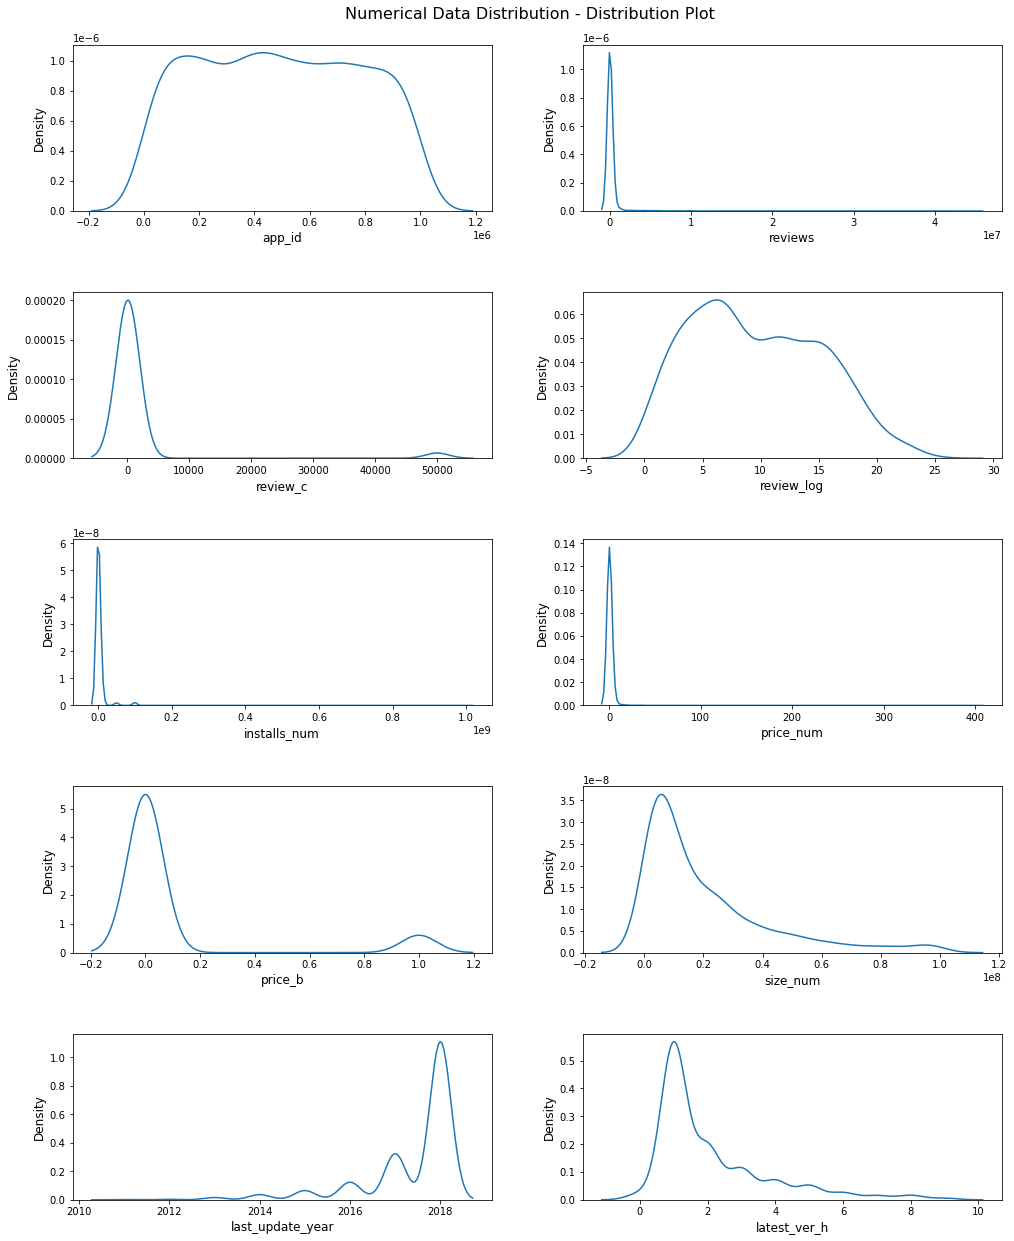

In [49]:
num_dist(train, var_list_n)

In [50]:
## check categorical variables again
train[var_list_c].describe()

,category,size,installs,price,suitable_for,last_update,latest_ver,popularity,popularity_b,category_b
count,1975,1975,1975,1975,1975,1975,1971,1975,1975,1975
unique,33,229,18,41,4,669,922,2,2,8
top,FAMILY,12M,"10,000+",0,Everyone,"August 3, 2018",1.0,High,1,OTHER
freq,409,53,275,1780,1641,56,157,1450,1450,841


## Data Wrangling & Visualization (Testing Set)

In [51]:
## load training data
test = pd.read_csv("I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/test.csv")

In [52]:
## create new variables/modify variables

## new variable 1: 'review_c'
test['review_c'] = pd.cut(test.reviews, bins = [0,100,10000,100000,1000000,50000000],
                           labels = [0.1, 10, 100, 1000, 50000])
test['review_c'] = test['review_c'].astype(int)

## new variable 2: 'review_log'
test['review_log'] = np.log2(test['reviews'])

## new variable 3: 'size_num'
test["size_num"] = test.apply(lambda row: transform_kmb(row, ['size']), axis=1)

## new variable 4: 'installs_num'
test["installs_num"] = test.apply(lambda row: transform_install(row, ['installs']), axis=1)

## new variable 5: 'price_num'
test["price_num"] = test.apply(lambda row: transform_p(row, ["price"]), axis=1)

## new variable 6: 'price_b'
test["price_b"] = test.apply(lambda row: transform_bp(row, ["price"]), axis=1)

## new variable 7: 'last_update_year'
test["last_update_year"] = test.apply(lambda row: transform_y(row, ["last_update"]), axis=1)

## new variable 8: 'latest_ver_h'
test["latest_ver_h"] = test.apply(lambda row: transform_ly(row, ["latest_ver"]), axis=1)

## new variable 9: 'category_b'
test["category_b"] = test.apply(lambda row: transform_bc(row, ["category"]), axis=1)

In [53]:
## modify: 'suitable_for'
# cate_frequency(test, 'suitable_for')
test = test.replace({'suitable_for' : { 'Adults only 18+' : 'Mature 17+'}})

In [54]:
## check the size of the dataset
print("Number of rows:", test.shape[0])
print("Number of columns:", test.shape[1])

Number of rows: 1018
Number of columns: 18


In [55]:
test.head()

,app_id,category,reviews,size,installs,price,suitable_for,last_update,latest_ver,review_c,review_log,size_num,installs_num,price_num,price_b,last_update_year,latest_ver_h,category_b
0,144236,TOOLS,262076,1.2M,"10,000,000+",0,Everyone,"January 4, 2018",1.0.2,1000,17.999626,1200000.0,10000000,0.0,0,2018,1,TOOLS
1,881323,PHOTOGRAPHY,12204,6.8M,"1,000,000+",0,Everyone,"March 14, 2017",1.5.2.21,100,13.575066,6800000.0,1000000,0.0,0,2017,1,OTHER
2,765524,TOOLS,632,8.2M,"500,000+",0,Everyone,"May 23, 2017",1.0,10,9.303781,8200000.0,500000,0.0,0,2017,1,TOOLS
3,390533,BUSINESS,29,16M,500+,0,Everyone,"July 5, 2018",2.2.1335,0,4.857981,16000000.0,500,0.0,0,2018,2,OTHER
4,817383,ART_AND_DESIGN,192,6.0M,"10,000+",0,Everyone,"April 25, 2018",1.5,10,7.584963,6000000.0,10000,0.0,0,2018,1,OTHER


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1018 entries, 0 to 1017
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            1018 non-null   int64  
 1   category          1018 non-null   object 
 2   reviews           1018 non-null   int64  
 3   size              1018 non-null   object 
 4   installs          1018 non-null   object 
 5   price             1018 non-null   object 
 6   suitable_for      1018 non-null   object 
 7   last_update       1018 non-null   object 
 8   latest_ver        1015 non-null   object 
 9   review_c          1018 non-null   int32  
 10  review_log        1018 non-null   float64
 11  size_num          1018 non-null   float64
 12  installs_num      1018 non-null   int64  
 13  price_num         1018 non-null   float64
 14  price_b           1018 non-null   int64  
 15  last_update_year  1018 non-null   int64  
 16  latest_ver_h      1018 non-null   int64  


In [57]:
test.isna().sum()

app_id              0
category            0
reviews             0
size                0
installs            0
price               0
suitable_for        0
last_update         0
latest_ver          3
review_c            0
review_log          0
size_num            0
installs_num        0
price_num           0
price_b             0
last_update_year    0
latest_ver_h        0
category_b          0
dtype: int64

In [58]:
## check numerical variables again
display(pd.DataFrame(num_descriptive(test, var_list_n)))

,Variable,Median,Mean,Standard Deviation,Minimum,Maximum,Range,Kurtosis,Skewness
0,app_id,5.179845e+05,5.130302e+05,2.835015e+05,0.0,9.992400e+05,9.992400e+05,-1.123167,-0.054842
1,reviews,4.255000e+02,1.569706e+05,1.149803e+06,1.0,2.313351e+07,2.313351e+07,225.321075,13.758707
2,review_c,1.000000e+01,1.145668e+03,7.096259e+03,0.0,5.000000e+04,5.000000e+04,43.341626,6.727665
3,review_log,8.732967e+00,9.311848e+00,5.437130e+00,0.0,2.446348e+01,2.446348e+01,-0.780414,0.332337
4,installs_num,5.000000e+04,3.092815e+06,2.401573e+07,1.0,5.000000e+08,5.000000e+08,359.207743,17.941456
5,price_num,0.000000e+00,3.934381e-01,1.874973e+00,0.0,1.999000e+01,1.999000e+01,63.146443,7.300266
6,price_b,0.000000e+00,8.644401e-02,2.810186e-01,0.0,1.000000e+00,1.000000e+00,6.662805,2.943264
7,size_num,1.100000e+07,2.028944e+07,2.219822e+07,8500.0,1.000000e+08,9.999150e+07,2.293732,1.683145
8,last_update_year,2.018000e+03,2.017374e+03,1.109171e+00,2011.0,2.018000e+03,7.000000e+00,6.426821,-2.339990
9,latest_ver_h,1.000000e+00,2.094303e+00,1.747563e+00,0.0,9.000000e+00,9.000000e+00,2.891347,1.783814


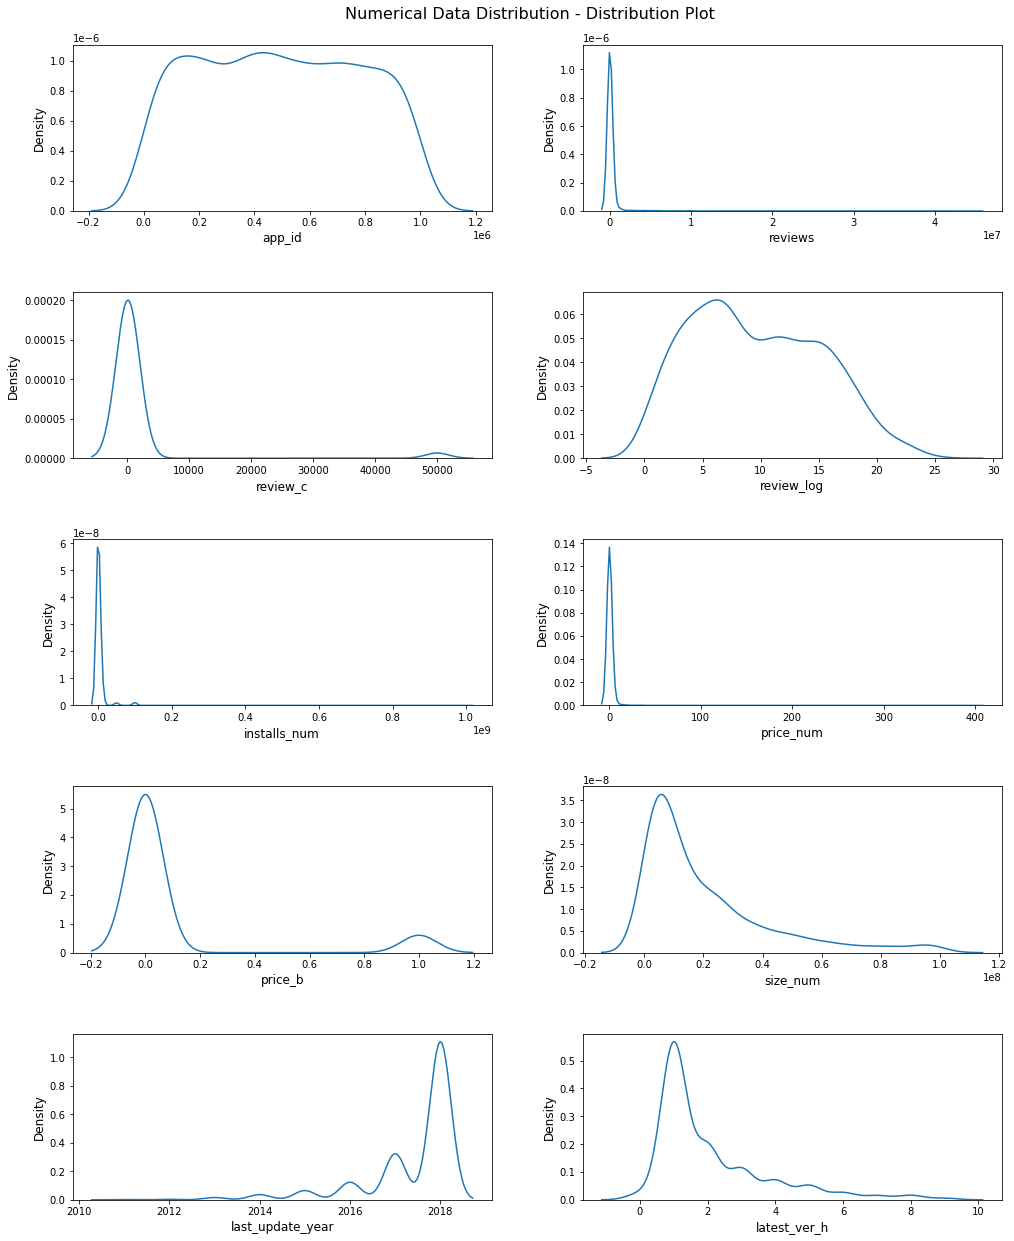

In [59]:
num_dist(train, var_list_n)

In [60]:
## check categorical variables again
# var_list_c.remove('popularity')
# var_list_c.remove('popularity_b')
var_list_c = list(set(var_list_c) - set(['popularity', 'popularity_b']))
test[var_list_c].describe()

,suitable_for,category_b,latest_ver,price,size,last_update,installs,category
count,1018,1018,1015,1018,1018,1018,1018,1018
unique,4,8,555,19,209,464,18,33
top,Everyone,OTHER,1.0,0,11M,"August 3, 2018","10,000+",FAMILY
freq,847,458,89,930,26,28,143,218


##  Encoding String Variables

In [61]:
## seperate features(X) from target(y)
# features_list = var_list_c + var_list_n
features_list = list(train.drop(['popularity', 'popularity_b'], axis=1).columns)

In [62]:
## remove useless feature 
features_list.remove('app_id')       ## id does not contribute to modeling popularity
features_list.remove('size')         ## a categorical variable with too many categories
features_list.remove('last_update')  ## a categorical variable with too many categories
features_list.remove('latest_ver')   ## a categorical variable with too many categories
features_list.remove('installs')     ## same as 'installs_num'
features_list.remove('price')        ## same as 'price_num'
features_list.remove('category')     ## same as 'category_b'

In [63]:
features_list

['reviews',
 'suitable_for',
 'review_c',
 'review_log',
 'category_b',
 'installs_num',
 'price_num',
 'price_b',
 'size_num',
 'last_update_year',
 'latest_ver_h']

In [78]:
X = train[features_list]
y = train['popularity_b']

In [65]:
print('data dimensions', X.shape)

data dimensions (1975, 11)


In [79]:
print('data dimensions', y.shape)

data dimensions (1975,)


In [80]:
y.to_csv('I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/y.csv')

In [66]:
features_to_encode = X.select_dtypes(include = ['object', 'category']).columns
features_to_encode

Index(['suitable_for', 'category_b'], dtype='object')

In [67]:
# X.head()
X[features_to_encode].head()

,suitable_for,category_b
0,Everyone,OTHER
1,Teen,GAME
2,Teen,FAMILY
3,Teen,FAMILY
4,Mature 17+,OTHER


###  One Hot Encode 

- Directly add the encoded binary variables in the data set
- Use the X_ohe as input features in modeling part

In [68]:
## creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder = OneHotEncoder()

In [69]:
## perform one-hot encoding on 'team' column 
X_ohe = pd.DataFrame(encoder.fit_transform(X[features_to_encode]).toarray())

In [70]:
## rename the encoded variables 
X_ohe.columns = encoder.get_feature_names()
list(X_ohe.columns)

['x0_Everyone',
 'x0_Everyone 10+',
 'x0_Mature 17+',
 'x0_Teen',
 'x1_FAMILY',
 'x1_FINANCE',
 'x1_GAME',
 'x1_HEALTH_AND_FITNESS',
 'x1_LIFESTYLE',
 'x1_MEDICAL',
 'x1_OTHER',
 'x1_TOOLS']

In [71]:
## check encoded data
X_ohe.head()

,x0_Everyone,x0_Everyone 10+,x0_Mature 17+,x0_Teen,x1_FAMILY,x1_FINANCE,x1_GAME,x1_HEALTH_AND_FITNESS,x1_LIFESTYLE,x1_MEDICAL,x1_OTHER,x1_TOOLS
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [72]:
## merge one-hot encoded columns back with original DataFrame
X_ohe = X.join(X_ohe)
X_ohe = X_ohe.drop(columns = ['suitable_for', 'category_b'])

In [73]:
## view final data with encoded variables
X_ohe.head()

,reviews,review_c,review_log,installs_num,price_num,price_b,size_num,last_update_year,latest_ver_h,x0_Everyone,...,x0_Mature 17+,x0_Teen,x1_FAMILY,x1_FINANCE,x1_GAME,x1_HEALTH_AND_FITNESS,x1_LIFESTYLE,x1_MEDICAL,x1_OTHER,x1_TOOLS
0,4,0,2.000000,50,0.00,0,511000.0,2016,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,568391,1000,19.116524,5000000,0.00,0,5200000.0,2014,4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,144,10,7.169925,1000,2.99,1,70000000.0,2018,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1499466,50000,20.516017,10000000,0.00,0,96000000.0,2018,1,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84,0,6.392317,1000,0.00,0,4500000.0,2018,8,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [74]:
X_ohe.to_csv('I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/X_ohe.csv')  

### Label Encode

- Transfer strings to number representation 
- Use the X_le as input features in modeling part 
- Need to use "transformer" in modeling part
- "transformer" will create One Hot Encoded variables

In [75]:
# ## encode labels with value between 0 and n_classes-1.
le = LabelEncoder()
X_le = X[features_to_encode].apply(le.fit_transform)
X_le.head()

,suitable_for,category_b
0,0,6
1,3,2
2,3,0
3,3,0
4,2,6


In [76]:
X_o = X.drop(columns = features_to_encode)
X_le = X_o.join(X_le)
X_le.head()

,reviews,review_c,review_log,installs_num,price_num,price_b,size_num,last_update_year,latest_ver_h,suitable_for,category_b
0,4,0,2.000000,50,0.00,0,511000.0,2016,1,0,6
1,568391,1000,19.116524,5000000,0.00,0,5200000.0,2014,4,3,2
2,144,10,7.169925,1000,2.99,1,70000000.0,2018,1,3,0
3,1499466,50000,20.516017,10000000,0.00,0,96000000.0,2018,1,3,0
4,84,0,6.392317,1000,0.00,0,4500000.0,2018,8,2,6


In [77]:
X_le.to_csv('I:/3. Application/External_Application/Intern/Data/2022 Data/2022 IBM/Data Challenge/X_le.csv')  